In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
import uuid

import matplotlib.pyplot as plt
import networkx as nx

from SPARQLWrapper import SPARQLWrapper, JSON, POST

from req_analysis import *

# Initialize connection to Neptune

In [3]:
%run 'req_analysis/libs/neptune-util.py'
%env NEPTUNE_CLUSTER_ENDPOINT=100.65.51.106
%env NEPTUNE_CLUSTER_PORT=8182
g = neptune.graphTraversal()

env: NEPTUNE_CLUSTER_ENDPOINT=100.65.51.106
env: NEPTUNE_CLUSTER_PORT=8182
gremlin: ws://100.65.51.106:8182/gremlin


# Initialize evaluation

In [4]:
sparql = SPARQLWrapper("https://cae-mms-rdf-test-r5-2x.cluster-cw2hjngge6pe.us-gov-west-1.neptune.amazonaws.com:8182/sparql")

In [5]:
ref_targets = ReferenceTargets(sparql)
ref_targets.init_table()

== Status Code: 200 ==
1951 reference targets found.


In [6]:
req_evaluator = RequirementEvaluator(sparql)
req_evaluator.init_requirement_elements()

== Status Code: 200 ==
3061 requirements found.


# Custom evaluation of an input string

In [23]:
input_string = """<html><body>\n<span xmlns="http://www.w3.org/1999/xhtml"><strong>[REQ-1-OAD-0185]</strong> The Observatory Safety system decomposition element is defined as follows:<br/>Associated WBS element(s): TMT.TEL.CONT.OSS<br/>The Observatory Safety System (OSS) contributes to the enforcement of safe conditions throughout the summit facility by continuously monitoring the state of connected equipment, systems and sensors and taking appropriate action as soon as an unsafe condition is detected."""

In [24]:
custom_evaluation = Evaluation(uuid.uuid4().hex, input_string, ref_targets, sparql)

In [25]:
custom_evaluation.tokens

[{'text': '<html><body', 'pos': 'PROPN', 'token_id': 0, 'whitespace': ''},
 {'text': '>', 'pos': 'X', 'token_id': 1, 'whitespace': ''},
 {'text': '\n', 'pos': 'SPACE', 'token_id': 2, 'whitespace': ''},
 {'text': '<span xmlns="http://www.w3.org/1999/xhtml"><strong>[REQ-1-OAD-0185]</strong',
  'pos': 'PROPN',
  'token_id': 3,
  'whitespace': ''},
 {'text': '>', 'pos': 'X', 'token_id': 4, 'whitespace': ' '},
 {'text': 'The Observatory Safety system decomposition element',
  'pos': 'NOUN',
  'token_id': 5,
  'whitespace': ' '},
 {'text': 'is', 'pos': 'AUX', 'token_id': 6, 'whitespace': ' '},
 {'text': 'defined', 'pos': 'VERB', 'token_id': 7, 'whitespace': ' '},
 {'text': 'as', 'pos': 'SCONJ', 'token_id': 8, 'whitespace': ' '},
 {'text': 'follows:<br/>Associated WBS',
  'pos': 'PROPN',
  'token_id': 9,
  'whitespace': ' '},
 {'text': 'element(s', 'pos': 'PROPN', 'token_id': 10, 'whitespace': ''},
 {'text': ')', 'pos': 'PUNCT', 'token_id': 11, 'whitespace': ''},
 {'text': ': TMT.TEL.CONT.OSS

[{'token': {'text': 'APS Mission', 'pos': 'PROPN', 'token_id': 0, 'whitespace': ' '}, 'model_element': {'uri': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_18_0_5_baa02e2_1450829462782_765401_166848', 'name': 'APS Mission', 'mms_id': '_18_0_5_baa02e2_1450829462782_765401_166848'}, 'score': -0.0}, {'token': {'text': 'APS Mission', 'pos': 'PROPN', 'token_id': 0, 'whitespace': ' '}, 'model_element': {'uri': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_17_0_2_3_41e01aa_1389728637481_651557_61606', 'name': 'APS Mission', 'mms_id': '_17_0_2_3_41e01aa_1389728637481_651557_61606'}, 'score': -0.0}, {'token': {'text': 'an APS User', 'pos': 'PROPN', 'token_id': 5, 'whitespace': ''}, 'model_element': {'uri': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_17_0_2_3_41e01aa_1389730769202_855584_72742', 'name': 'APS User', 'mms_id': '_17_0_2_3_41e01aa_1389730769202_855584_72742'}, 'score': 0.0}] 
___________
3902 comparaisons
Time:  0.1723771095275879
0 1
DISTANCE: in 1.7189278602600098 s  5
_____

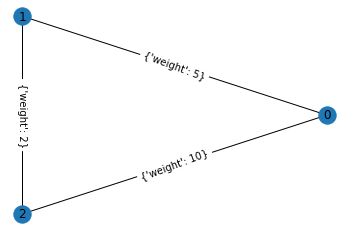

In [15]:
custom_evaluation.evaluate(g, remove_stopwords=True, pprint=True)

# Custom evaluation of a requirement
Change only `req_id` and verify the content of the requirement with the next cell

In [7]:
req_id = '_831_331c90b6-9e17-4c46-8530-0fc345e0a22f_asi'

In [8]:
req_evaluator.get_requirement_by_id(req_id)

{'slot': {'type': 'uri',
  'value': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_831_331c90b6-9e17-4c46-8530-0fc345e0a22f_asi-slot-_11_5EAPbeta_be00301_1147873226632_528960_2311'},
 'instance': {'type': 'uri',
  'value': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_831_331c90b6-9e17-4c46-8530-0fc345e0a22f_asi'},
 'valueString': {'type': 'literal',
  'value': '<html><body>\n<span xmlns="http://www.w3.org/1999/xhtml"><strong>[REQ-1-OAD-0185]</strong> The Observatory Safety system decomposition element is defined as follows:<br/>Associated WBS element(s): TMT.TEL.CONT.OSS<br/>The Observatory Safety System (OSS) contributes to the enforcement of safe conditions throughout the summit facility by continuously monitoring the state of connected equipment, systems and sensors and taking appropriate action as soon as an unsafe condition is detected. It is independent from and supplementary to any safety systems and functionality that is contained within individual subsystems. Based on one or

[{'token': {'text': 'The Observatory Safety System', 'pos': 'PROPN', 'token_id': 14, 'whitespace': ' '}, 'model_element': {'uri': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_18_0_5_f1d0357_1462834114886_542515_148655', 'name': 'Observatory Safety Systems', 'mms_id': '_18_0_5_f1d0357_1462834114886_542515_148655'}, 'score': 0.002457028494028205}, {'token': {'text': 'The Observatory Safety System', 'pos': 'PROPN', 'token_id': 14, 'whitespace': ' '}, 'model_element': {'uri': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_4663af6e-6265-438d-87b8-74e1550518bf__905_643f5aef-34e6-4137-8c0f-d1cf4d9a9e7d', 'name': 'Observatory Safety System', 'mms_id': '_4663af6e-6265-438d-87b8-74e1550518bf__905_643f5aef-34e6-4137-8c0f-d1cf4d9a9e7d'}, 'score': 0.0011396016107172273}, {'token': {'text': 'the Data Management System', 'pos': 'PROPN', 'token_id': 119, 'whitespace': ' '}, 'model_element': {'uri': 'https://opencae.jpl.nasa.gov/mms/rdf/element/_16566_c270fe21-19e7-4d0d-aa3c-31b76ad6ca8b', 'name': 'D

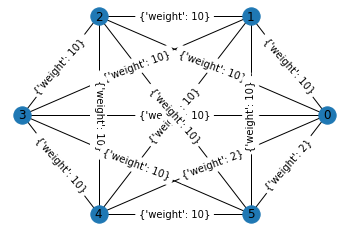

In [9]:
req_evaluator.evaluate_req_by_id(g, req_id, ref_targets, remove_stopwords=False, pprint=True)